# Logistic regression using numpy on a dataframe. 
## The goal is to run logistic regression using numpy. 
## What will you get:
1. Build the general architecture of a learning algorithm, including:
2. Initializing parameters
3. Calculating the cost function and its gradient
4. Using an optimization algorithm (gradient descent)

#### Note: Data is about overall rating of players in FIFA17. The goal is to predict based on features of players, whether his overall rating is greater than 84 or not. Pandas and sklearn are used only to read data and split data as these functions are very powerful and easier to use than numpy helper functions

In [14]:
# Importing packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Import data
df = pd.read_csv('FullData.csv')

In [17]:
# Split the data into test and train. Here Y var is 'Overall', we are also splitting train and test into Y vars and X vars
train, test = train_test_split(df, test_size = 0.2)
y_train = train['Overall']
y_test = test['Overall']
x_train = train.iloc[:, train.columns != 'Overall']
x_test = test.iloc[:, test.columns != 'Overall']

In [21]:
# Check the size
print ("Number of training examples: m_train = " + str(x_train.shape[0]) 
       + " and number of examples in Yvar = " + str(y_train.shape[0]))
print ("Number of test examples: m_train = " + str(x_test.shape[0]) + 
       " and number of examples in Yvar = " + str(y_test.shape[0]))

Number of training examples: m_train = 14070 and number of examples in Yvar = 14070
Number of test examples: m_train = 3518 and number of examples in Yvar = 3518


In [22]:
# Converting dataframe to array
train_X_arr = np.array(x_train)
test_X_arr = np.array(x_test)

In [24]:
# For convenience, we will flatten the X of train and test
X_train_flatten = train_X_arr.reshape(train_X_arr.shape[0], -1).T
X_test_flatten = test_X_arr.reshape(test_X_arr.shape[0], -1).T
y_train = np.array(y_train).reshape((1,y_train.shape[0]))
y_test =  np.array(y_test).reshape((1,y_test.shape[0]))

In [25]:
print ("train_set_x_flatten shape: " + str(X_train_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(X_test_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))


train_set_x_flatten shape: (39, 14070)
train_set_y shape: (1, 14070)
test_set_x_flatten shape: (39, 3518)
test_set_y shape: (1, 3518)


In [30]:
# Function to calculate sigmoid, z is a scalar or numpy array of any size
def sigmoid(z):
    s = 1/(1+np.exp(-z))   
    return s
# initialize_with_zeros
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

In [31]:
# propagate() that computes the cost function and its gradient.
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)       
    cost = -(np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A))))/m

    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ()) 
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [32]:
# The goal is to learn  ww  and  bb  by minimizing the cost function  JJ . For a parameter  θθ , the update rule is  θ=θ−α dθθ=θ−α dθ , where  αα  is the learning rate.
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    costs = []   
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [33]:
# To predict
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):
        Y_prediction[0,i] = 1 if A[0,i]> 0.5  else 0           
        pass
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [34]:
# Modeling.....
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations= num_iterations, learning_rate = learning_rate, print_cost = False)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [35]:
d = model(X_train_flatten, y_train, X_test_flatten, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.51670220326936 %
test accuracy: 99.6304718590108 %


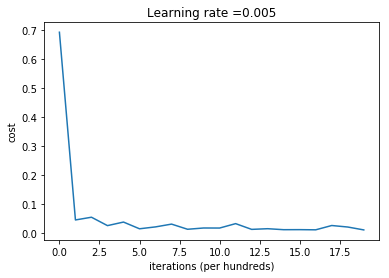

In [38]:
# Graph costs
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()